In [1]:
#Librerías a usar
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [2]:
#se toman los accesos directos de los archivos que se han guardado en el drive
drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/incan.Master.scope.txt' 'ref.txt'
!cp '/content/gdrive/My Drive/incan.Master.dark.txt' 'dark.txt' 
!cp '/content/gdrive/My Drive/lampLED.Master.scope.txt' 'lam.txt' 
!cp '/content/gdrive/My Drive/azul.Master.scope' 'azul.txt'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Abrimos los datos con los que vamos a trabajar

with open('ref.txt') as f:
  n = len(list(f))

with open('ref.txt') as f:
  d = len(list(f))

with open('ref.txt') as f:
  l = len(list(f))

with open('ref.txt') as f:
  a = len(list(f))

#Los archivos txt ahora se toman como variables que por la estructura se tomaran como arreglos

ref = np.loadtxt('ref.txt',delimiter='\t',skiprows=14,max_rows=n-16)
dark = np.loadtxt('dark.txt',delimiter='\t',skiprows=14,max_rows=d-16)
lam = np.loadtxt('lam.txt',delimiter='\t',skiprows=14,max_rows=l-16)
azul = np.loadtxt('azul.txt',delimiter='\t',skiprows=14,max_rows=a-16)

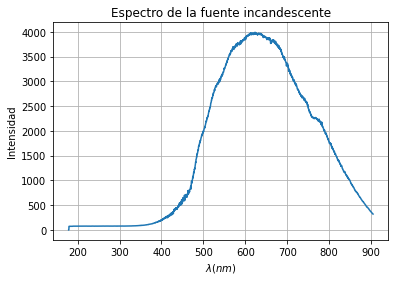

In [4]:
#Vamos a seprara cada columna para proceder a graficar

Lr= ref[:,0] #Longitud de onda 
Ir= ref[:,1] #Intensidad 

#Se procede a gráficar el espectro de la fuente incandescente
plt.plot(Lr,Ir)
plt.title("Espectro de la fuente incandescente")
plt.xlabel("$\lambda(nm)$")
plt.ylabel("Intensidad")
plt.grid()
plt.show()


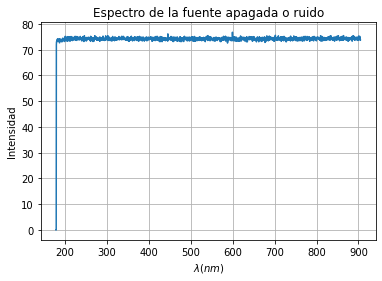

In [5]:
Ld= dark[:,0] #Longitud de onda
Id= dark[:,1] #Intensidad 

#Se procede a gráficar el espectro del ruido
plt.plot(Ld,Id)
plt.title("Espectro de la fuente apagada o ruido")
plt.xlabel("$\lambda(nm)$")
plt.ylabel("Intensidad")
plt.grid()
plt.show()

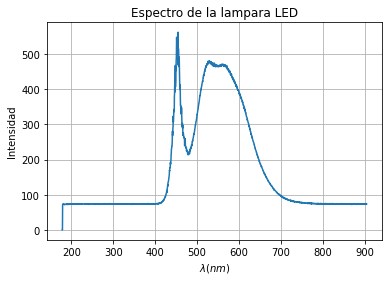

In [6]:
Ll= lam[:,0] #Longitud de onda
Il= lam[:,1] #Intensidad 

#Se procede a gráficar el espectro de la lampara LED
plt.plot(Ll,Il)
plt.title("Espectro de la lampara LED")
plt.xlabel("$\lambda(nm)$")
plt.ylabel("Intensidad")
plt.grid()
plt.show()

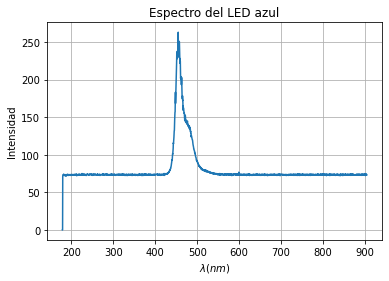

In [7]:
La= azul[:,0] #Longitud de onda
Ia= azul[:,1] #Intensidad 

#Se procede a gráficar el espectro del LED
plt.plot(La,Ia)
plt.title("Espectro del LED azul")
plt.xlabel("$\lambda(nm)$")
plt.ylabel("Intensidad")
plt.grid()
plt.show()

Antes de seguir cabe observar algunas cosas sobre las gráficas anteriores, primero el espectro observado de la fuente tiene una forma que hace ver porque el modelo suele tomarla como un cuerpo negro, por otro lado vemos que su espectro se sale del espectro visible y que si pico es un amarillo/anaranjado, en general el ruido el ruido parece constante(oscila en un pequeño intervalo de valores), la lampara LED tiene dos picos con el mayor cercano al azul y mayor parte de entre el verde y el amarillo y al final el LED azul muestra un resultado esperado el cual solo emite en un pequeño ancho(azul) y se observa un valor constate luego de 50 en donde no debería emitir el cual es debido al ruido que gráfica oscila en los alrededores de 70 y 80, igualmente se observa la medida del ruido para la lampara LED

In [8]:
#Ahora veamos la gráfica de cuerpo negro para una temperatura de 2500K

h= 6.62*10**(-34) #J*s (constante de Planck)
T= 2500 #K (temperatura)
k= 1.38*10**(-23) #J/K #constante de Boltzmann
c= 3e8 #m/s #velocidad de la luz
def E(x):
  return (8*np.pi*h*c)/((x)**5)*(1)/(np.exp(h*c/(x*k*T))-1) #Ecuación de un cuerpo negro

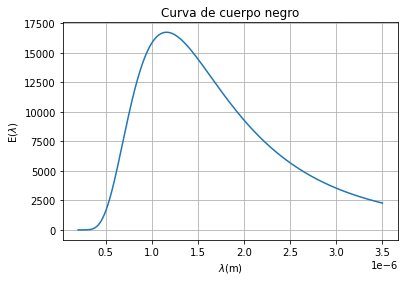

In [9]:
x = np.linspace(200*10**(-9),3500*10**(-9),len(Ia)) #Longitudes de ondas del cuerpo negro, 

#Graficamos la curva de cuerpo negro
plt.plot(x,E(x))
plt.title("Curva de cuerpo negro")
plt.xlabel("$\lambda$(m)")
plt.ylabel("E($\lambda$)")
plt.grid()
plt.show()

In [10]:
#Normmalizamos la ecuación diviendieno por el máximo de la función

Emax = np.max(E(x)) 

lo = np.array(ref[:,0]*10**(-9)) #Longitudes de onda en metros

B =E(lo)/Emax #Cuerpo negro normalizada
R= ref[:,1] #Fuente incandescente
D = dark[:,1] #Ruido

def I(S): #Definimos la función de irradiancia relativa
  return B*(S-D)/(R-D) #S es el espectro muestra 

# Veamos la irradiancia para la fuente incandecente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


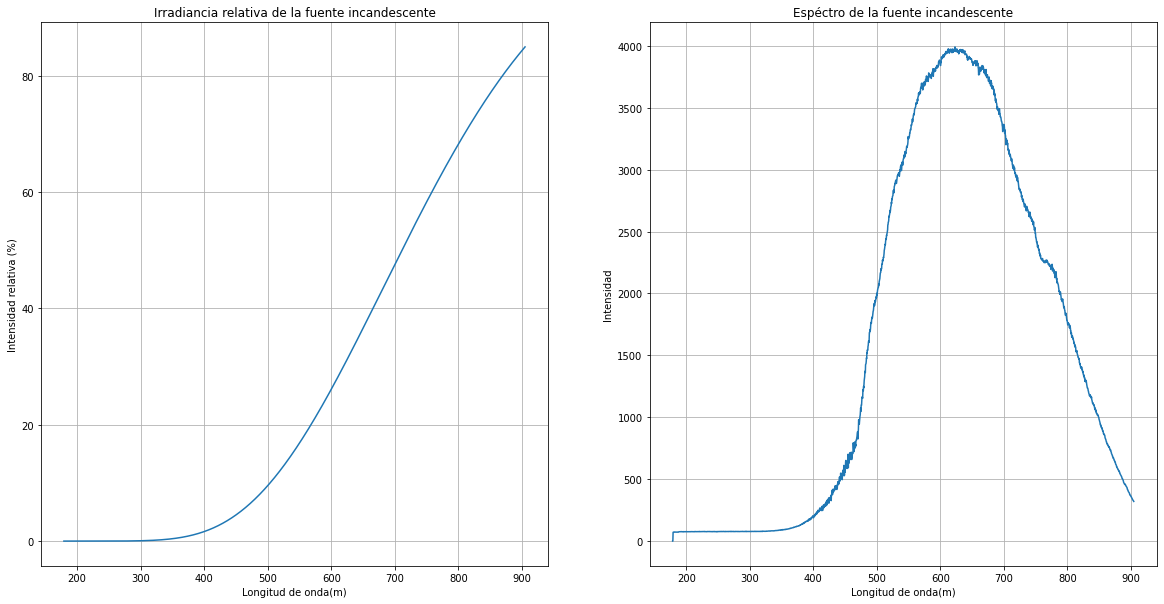

In [11]:
fig = plt.figure(figsize=(20,10)) #Se crea la figura 

#Se crearan los subplots
ax1 = fig.add_subplot(121)
plt.grid()
ax2 = fig.add_subplot(122)
plt.grid()

#Hay que observar que para el caso de la fuente incandecente S=R

ax1.set_title("Irradiancia relativa de la fuente incandescente")
ax1.set_xlabel("Longitud de onda(m)")
ax1.set_ylabel("Intensidad relativa (%)")
ax1.plot(lo*10**9,I(R)*100)

ax2.set_title("Espéctro de la fuente incandescente")
ax2.set_xlabel("Longitud de onda(m)")
ax2.set_ylabel("Intensidad")
ax2.plot(lo*10**9,R)

fig.show()

Como se vio anteriormente el espectro de la fuente incandescente se forma una campana cuyo pico se encuentra cerca del amarillo (600 nm)  lo cual hace susceptible al sistema a dichas longitudes de ondas cercanas a dicho valor y  valores entre 400 nm y 900 nm tienden al ruido, por otro lado los valores anteriores a 400 nm se ajustan con la irradiancia relativa como valores despreciables para la fuente que pueden ser tomados como ruido y solo valores del resto del espectro visible posibles pero con un pico alejado del amarillo y por ende nuestras medidas no son tan confiables ya que existe una mayor irradiancia en rojo que en amarillo que nuestro sistema no interpretara.

# Lampara LED

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


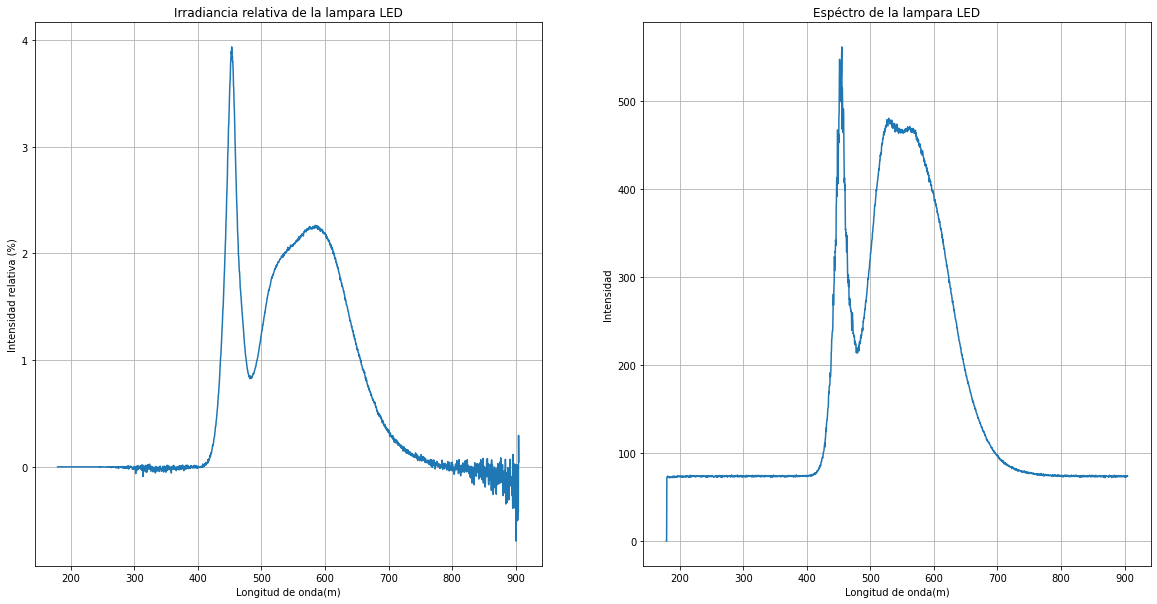

In [12]:
fig = plt.figure(figsize=(20,10)) #Se crea la figura 

#Se crearan los subplots
ax1 = fig.add_subplot(121)
plt.grid()
ax2 = fig.add_subplot(122)
plt.grid()

ax1.set_title("Irradiancia relativa de la lampara LED")
ax1.set_xlabel("Longitud de onda(m)")
ax1.set_ylabel("Intensidad relativa (%)")
ax1.plot(lo*10**9,I(Il)*100)

ax2.set_title("Espéctro de la lampara LED")
ax2.set_xlabel("Longitud de onda(m)")
ax2.set_ylabel("Intensidad")
ax2.plot(lo*10**9,Il)

fig.show()

Anteriormente se hablo sobre la medida de la lampara LED por ello sera más fácil poder concluir de ella partiendo de la irradiancia relativa, lo primero a notar es que loa valores constantes vistos antes de 400 nm y después de 700 nm son debidos al ruido, se vuelve a observar un máximo con un pequeño ancho entre 400 nm y 500 nm, el segundo pico se halla cerca a 600 nm cosa que la medida se aleja pero sigue siendo un valor entre 500 nm y 600 nm por otro lado vemos como la altura del segundo pico es comparable a la mitad de la altura del primer pico cosa que no pasa con el espectro por lo cual vemos que el espectrometro es más susceptible a medir entre 500 nm y 700 nm.

# LED azul

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


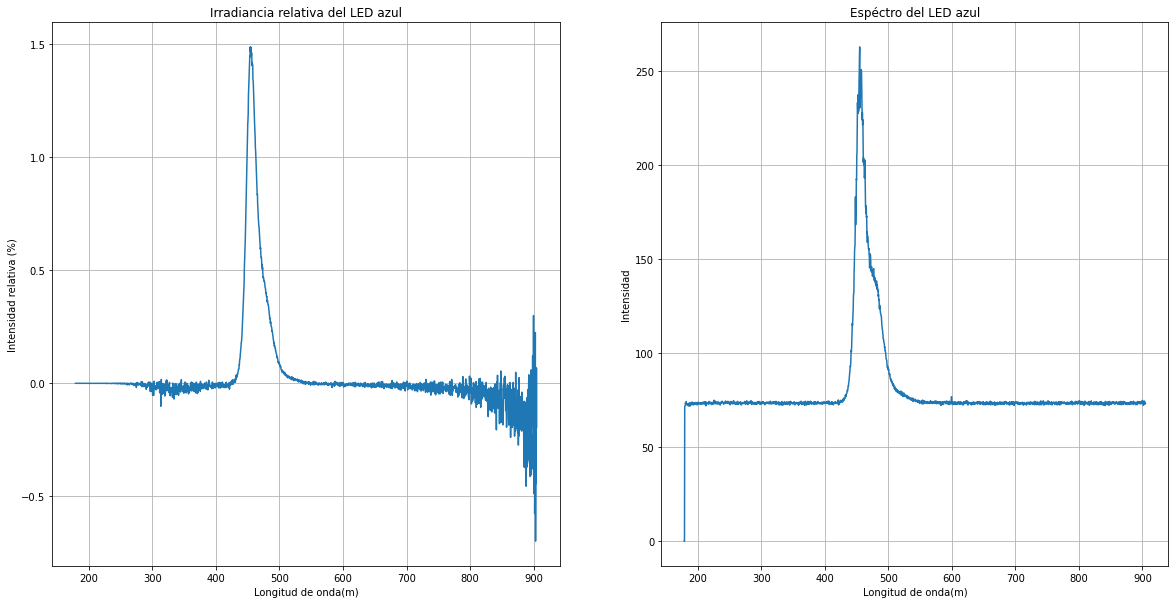

In [13]:
fig = plt.figure(figsize=(20,10)) #Se crea la figura 

#Se crearan los subplots
ax1 = fig.add_subplot(121)
plt.grid()
ax2 = fig.add_subplot(122)
plt.grid()

ax1.set_title("Irradiancia relativa del LED azul")
ax1.set_xlabel("Longitud de onda(m)")
ax1.set_ylabel("Intensidad relativa (%)")
ax1.plot(lo*10**9,I(Ia)*100)

ax2.set_title("Espéctro del LED azul")
ax2.set_xlabel("Longitud de onda(m)")
ax2.set_ylabel("Intensidad")
ax2.plot(lo*10**9,Ia)

fig.show()

Al igual que con la lampara LED se observa como todo valor antes de 400 nm puede considerarse ruido pero antes de ello si muestra un comportamiento como si se el LED emitiera con poca intensidad antes de poderse encender, luego se observa lo esperado y es una medida de un pico entre 400 nm y 500 nm lo cual pertenece al azul(justo lo esperado) y nos muestra en ese corto rango que la medida del LED(espectro) es preciso al compararlo con su irradiancia relativa.


# Conclusiones

Ya para finalizar es apreciable que aunque nuestra fuente no emita en ciertos rangos muestra valores debido al alrededor, en el caso el ruido se encuentra a un orden de magnitud por debajo de los picos de las medidas pero puede ser confundido con las medidas más alejadas del pico por lo cual debe tenerse en cuenta, como se observa con la lampara LED y la fuente incandescente el espectrometro es susceptible a valores cercanos al rango 500 nm y 600 nm por lo que hará sus medidas más favorables que las otras longitudes de onda cosa que para el LED azul no afecto ya que este no debería poseer dichas longitudes de onda y se observa una precisión ya que el espectro tiende a su valor teórico cosa que en los anteriores elementos fueron alterados en el rango anterior.